# Проект: Исследование стартапов


- Автор: Агафонова Ольга.
- Дата: 25.04.2025г.

## Введение

**Цель проекта** - исследование и анализ развития перспективных стартапов для передачи необходимых сведений финансовой компании, готовой проинвестировать разработку лучших моделей бизнеса предоставлением льготных займов. 


**Задачи проекта:**


1. Загрузка данных и знакомство с содержимым;
2. Проведение предобработки данных;
3. Исследование и анализ объединённых данных:
4. Вывод и рекомендации для заказчика.

### Описание данных

В проектной работе будут использованы данные следующих датасетов:

    
**1.** ***`/datasets/company_and_rounds.csv` - содержит  информацию о компаниях и раундах финансирования:***

* `company ID` — идентификатор компании;
* `name` — название компании;
* `category code` — категория области деятельности компании;
* `status` — статус компании;
* `founded at` — дата инвестирования;
* `closed at` — дата закрытия компании;
* `domain` — официальный сайт компании;
* `network username` — ник компании в сети;
* `country code` — код страны компании;
* `investment rounds` — число инвестиционных раундов;
* `funding rounds` — число раундов финансирования;
* `funding total` — сумма финансирования;
* `milestones` — вехи финансирования;
* `funding round id` — идентификатор этапа финансирования;
* `company id` — идентификатор компании;
* `funded at` — дата финансирования;
* `funding round type` — тип финансирования;
* `raised amount` — сумма финансирования;
* `pre money valuation` — предварительная денежная оценка;
* `participants` — число участников;
* `is first round` — является ли раунд первым;
* `is last round` — является раунд последним.

    
**2.** ***`/datasets/acquisition.csv` - содержит информацию о покупках одними компаниями других компаний:***
    
    
* `id` — идентификатор покупки;
* `acquiring_company_id` — идентификатор покупающей компании;
* `acquired_company_id` — идентификатор покупаемой компании;
* `term_code` — варианты расчёта;
* `price_amount` — сумма сделки;
* `acquired_at` — дата сделки.


**3.** ***`/datasets/people.csv` - содержит информацию о сотрудниках:***


* `id` — идентификатор сотрудника;
* `first_name` — имя сотрудника;
* `last_name` — фамилия сотрудника;
* `company_id` — идентификатор компании;
* `network_username` — ник в социальных сетях.

**4.** ***`/datasets/education.csv` - содержит информацию об образовнии сотрудника:***


* `id` — идентификатор записи об образовании;
* `person_id` — идентификатор работника;
* `instituition` — название учебного заведения;
* `graduated_at` — дата получения образования.


**5.** ***`/datasets/degrees.csv` - содержит информацию о типе образования сотрудника:***


* `id` — идентификатор записи;
* `object_id` — идентификатор сотрудника;
* `degree_type` — тип образования;
* `subject` — специальность.


Так же, есть два дополнительных датасета, которые связаны с исследуемыми данными:


**1.** ***`/datasets/fund.csv` - содержит информацию о фондах:***


* `id` — идентификатор фонда;
* `name` — название фонда;
* `category_code` — категория области деятельности компании;
* `founded_at` — дата создания фонда;
* `domain` — сайт фонда;
* `network_username` — ник фонда в сети;
* `country_code` — код страны фонда;
* `investment_rounds`— число инвестиционных раундов;
* `invested_companies` — число профинансированных компаний;
* `milestones` — вехи финансирования.


**2.** ***`/datasets/investment.csv` - содержит информацию о раундах инвестирования:***


* `id` — идентификатор этапа инвестирования;
* `funding_round_id` — идентификатор раунда инвестирования;
* `company_id` — индентификатор компании;
* `funding_round_type` — тип финансирования;
* `fund_id` — идентификатор фонда.


### Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.

---

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

- Загружаем файлы с основными данными: 

* `acquisition.csv`
* `company_and_rounds.csv`
* `people.csv`
* `education.csv`
* `degrees.csv`


- Загружаем опциональные датасеты: 

* `fund.csv`
* `investment.csv`

In [1]:
# Импортируем необходимые библиотеки:

# для обработки и анализа данных
import pandas as pd
pd.set_option('display.max_columns', 100)

# для визуализации данных и построения диаграммы Венна:
!pip install matplotlib_venn -q
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import seaborn as sns

# для работы с многомерными массивами:
import numpy as np

import warnings
warnings.simplefilter(action='ignore')


In [2]:
import pandas; print(pandas.__version__)
import matplotlib; print(matplotlib.__version__)
import seaborn; print(seaborn.__version__)
import numpy; print(numpy.__version__)

1.3.4
3.4.3
0.11.2
1.21.1


In [3]:
!pip install pandas==1.3.4 -q

In [4]:
!pip install matplotlib==3.4.3 -q

In [5]:
!pip install seaborn==0.11.2 -q

In [6]:
# Сохраним путь к датасетам в переменную PATH и выгрузим поочередно все датасеты:
PATH = 'https://code.s3.yandex.net/datasets/'

# Выгружаем данные из датасета acquisition.csv в датафрейм df_acq:
df_acq = pd.read_csv(PATH + 'acquisition.csv')

In [7]:
# Выводим информацию о датафрейме `df_acq`:
df_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [8]:
# Выводим первые строки датафрейма `df_acq` на экран:
df_acq.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
# Выгружаем данные из датасета company_and_rounds.csv в датафрейм df_car:
df_car = pd.read_csv(PATH + 'company_and_rounds.csv')

In [10]:
# Выводим информацию о датафрейме `df_car`:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [11]:
# Выводим первые строки датафрейма `df_car` на экран:

df_car.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В связи с тем, что cтолбцы `funding  rounds` и `funding  total` не отобразились в общем списке столбцов датафрейма `df_car`, выведем отдельно их значения на экран для анализа содержимого.

Используя диаграмму Венна, рассмотрим детальнее соотношение столбцов  `company  ID` и `company  id` в датафрейме df_car - на сколько они совпадают. 

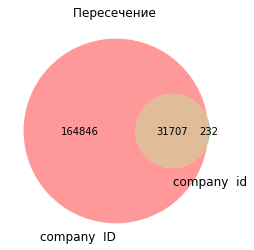

In [12]:
# Составим два множества с уникальными значениями данных столбцов:
first_id = set(df_car['company  ID'].dropna().unique())
second_id = set(df_car['company  id'].dropna().unique())

# Строим диаграмму Венна:
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график:
plt.title("Пересечение ")
plt.show() 

*Видно, что почти все значения столбца `company  id` совпадают с данными столбца  `company  ID`. Значит, столбец `company  ID` содержит идентификаторы всех компаний, а в  `company  id` отражена информация только об избранных компаниях, задействованных,например, в раундах финансирования.*

In [13]:
# Выгружаем данные из датасета people.csv в датафрейм df_peop:
df_peop = pd.read_csv(PATH + 'people.csv')

In [14]:
# Выводим информацию о датафрейме `df_peop`:
df_peop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [15]:
# Выводим первые строки датафрейма `df_peop` на экран:
df_peop.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
# Выгружаем данные из датасета education.csv в датафрейм df_edu:
df_edu = pd.read_csv(PATH + 'education.csv')

In [17]:
# Выводим информацию о датафрейме `df_edu`:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [18]:
# Выводим первые строки датафрейма `df_edu` на экран:
df_edu.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [19]:
# Выгружаем данные из датасета degrees.csv в датафрейм df_deg:
df_deg = pd.read_csv(PATH + 'degrees.csv')

In [20]:
# Выводим информацию о датафрейме `df_deg`:
df_deg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [21]:
# Выводим первые строки датафрейма `df_deg` на экран:
df_deg.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [22]:
# Выгружаем данные из датасета fund.csv в датафрейм df_fund:
df_fund = pd.read_csv(PATH + 'fund.csv')

In [23]:
# Выводим информацию о датафрейме `df_fund`:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [24]:
# Выводим первые строки датафрейма `df_fund` на экран:
df_fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [25]:
# Выгружаем данные из датасета investment.csv в датафрейм df_inv:
df_inv = pd.read_csv(PATH + 'investment.csv')

In [26]:
# Выводим информацию о датафрейме `df_inv`:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [27]:
# Выводим первые строки датафрейма `df_inv` на экран:
df_inv.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


---

###  Сформируем промежуточный вывод относительно полученных данных:




**1. Датафрейм `df_acq`** занимает объем оперативной памяти 441.1 КВ и содержит 9407 строк и 6 столбцов, в которых находится **информация о покупках одними компаниями других компаний**.

Изучим типы данных и их корректность.
В датасете представлены два типа данных: 


**Целочисленные значения (int64).** Четыре столбца с данным типом:

* `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` - для значений всех этих столбцов, кроме `price_amount`, тип данных int64 является типичным. Столбец `price_amount` содержит информацию о сумме сделки, поэтому тип данных float64 здесь был бы уместней, но, учитывая большие значения этих сумм, тип данных столбца оставим без изменений.


**Строковые данные (object).**  Два столбца имеют тип данных object:

* `term_code` и `acquired_at` - столбцы имеют строковые значения (object). Для значений столбца `term_code`, который содержит информацию о вариантах расчета, тип данных object вполне соответствует. А столбец  `acquired_at` с информацей о дате сделки логичней будет перевести в тип данных datetime64.


**Также, отметим, что:**

* в столбцах `term_code` и `acquired_at` присутствуют пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

**2. Датафрейм `df_car`** занимает объем оперативной памяти 36.6 MВ и содержит 217774 строки и 22 столбца, в которых находится **информация о компаниях и раундах финансирования**. 

В первую очередь, хочу обратить внимание на количество строк датафрейма - ни один столбец, даже идентификаторы, не содержит полное число строк. В каждом столбце присутствуют пропуски либо набор данных в этой таблице представлен не корректно, что вероятней.


Создается впечатление, что данный датафрейм  неумело собран из нескольких таблиц, где часть данных утеряна, а некоторые столбцы кажутся задвоенными, содержат не совсем логичную информацию (либо информация, вообще, отсутствует) относительно содержимого датафрейма. Об этом, также, свидетельствует наличие двух практически одинаковых идентифицирующих столбцов `company ID` и `company id`. Их пересечение, т.е. соотношение этих двух столбцов, отражено с помощью диаграммы Венна, где видно, что их данные практически совпадают.


Также отмечу,что названия столбцов датафрейма не соответствуют стилю snake case.

Рассмотрим подробней столбцы датафрейма.
В датасете представлены два типа данных: 


**Числовые значения с плавающей точкой (float64).** Двенадцать столбцов с данным типом:

* `company ID`, `investment rounds`, `funding rounds`, `funding total`, `milestones`, `funding round id`, `company id`, `raised amount`, `pre money valuation`, `participants`, `is first round` и `is last round`.

Для корректного отображения данных, все столбцы датафрейма, кроме `funding total`, `raised amount` и `pre money valuation`, лучше привести к целочисленному типу данных.


**Строковые данные (object).**  Десять столбцов имеют тип данных object:

* `name`, `category code`, `status`, `founded at`, `closed at`, `domain`, `network username`,  `country code`, `funded at` и `funding round type`.


Тип данных object является типичным для содержимого почти всех указанных столбцов, кроме `founded at`, `closed at` и `funded at`, значениям которых корректней присвоить тип данных datetime64.


---


**3. Датафрейм `df_peop`** занимает объем оперативной памяти 8.6 МВ и содержит 226709 строк и 5 столбцов, в которых находится **информация о сотрудниках**.

Изучим типы данных и их корректность.
В датасете представлены три типа данных: 


**Целочисленные значения (int64).** Один столбец с данным типом:

* `id` - сожержит информацию об идентификаторах сотруднков, тип данных int64 является типичным. 


**Строковые данные (object).**  Три столбца имеют тип данных object:

* `first_name`, `last_name` и `network_username` - столбцы имеют строковые значения (object), что вполне соответствует их содержимому.


**Числовые значения с плавающей точкой (float64).** Один столбец с данным типом:

* `company_id` - идентификатор компании. Логичней, данный столбец привести к целочисленному типу данных.


**Обратим внимание, что:**

* все столбцы датафрейма, кроме `id`, содержат пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

**4. Датафрейм `df_edu`** занимает объем оперативной памяти 3.3 МВ и содержит 109610 строк и 4 столбца, в которых находится **информация об образовании сотрудника**.

Изучим типы данных и их корректность.
В датасете представлены два типа данных: 


**Целочисленные значения (int64).** Два столбца с данным типом:

* `id` и `person_id` - сожержит идентифицирующую информацию, представленную числовыми значениями. Здесь тип данных int64 корректен. 


**Строковые данные (object).**  Два столбца имеют тип данных object:

* `instituition` и `graduated_at` - для столбца `instituition` строковый тип данных является типичным, а значения столбца `graduated_at` с датой получения образования нужно привести к типу datetime64.


**Отметим, что:**

* столбцы датафрейма `instituition` и `graduated_at` содержат пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

**5. Датафрейм `df_deg`** занимает объем оперативной памяти 3.3 МВ и содержит 109610 строк и 4 столбца, в которых находится **информация о типе образования сотрудника**.

Изучим типы данных и их корректность.
В датасете представлены два типа данных: 


**Целочисленные значения (int64).** Один столбец с данным типом:

* `id` - идентификатор записи, представлен числовым значением. Здесь тип данных int64 корректен. 


**Строковые данные (object).**  Три столбца имеют тип данных object:

* `degree_type`, `object_id` и `subject` - для столбцов  `degree_type` и `subject` строковый тип данных является типичным, а значения столбца `object_id` необходимо преобразовать в тип данных int64, но, предварительно, строки нужно очистить от буквенных значений и знаков припенания, оставив только числовые данные. Затем, привести к типу float64, а далее - уже к int64. 


**Также, отметим, что:**

* столбцы датафрейма `degree_type` и `subject` содержат пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

**6. Датафрейм `df_fund`** занимает объем оперативной памяти 819.4 КВ и содержит 11652 строки и 9 столбцов, в которых находится **информация о фондах**.

Изучим типы данных и их корректность.
В датасете представлены два типа данных: 


**Целочисленные значения (int64).** Четыре столбца с данным типом:

* `id`, `investment_rounds`, `invested_companies`, `milestones` - здесь тип данных столбцов int64 представлен корректно.


**Строковые данные (object).**  Пять столбцов имеют тип данных object:

* `name`, `founded_at`, `domain`, `network_username` и `country_code` - столбцы имеют строковый тип данных (object), что для всех значений столбцов является типичным, кроме столбца  `founded_at`, который содержит информацию о дате создания фонда. Значения данного столбца необходимо привести к типу данных datetime64.


**Также, отметим, что:**

* столбцы датафрейма  `name`, `founded_at`, `domain`, `network_username`, `country_code` содержат пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

**7. Датафрейм `df_inv`** занимает объем оперативной памяти 1.9 МВ и содержит 61403 строки и 4 столбца, в которых находится **информация о раундах инвестирования**.

Изучим типы данных и их корректность.
В датасете представлен один тип данных: 


**Целочисленные значения (int64).** Все столбцы с данным типом:

* `id`, `funding_round_id`, `company_id`, `fund_id` - целочисленный тип данных столбцов представлен корректно.


**Также, отметим, что:**

* столбцы данного датафрейма не содержат пропуски;
* названия столбцов датафрейма прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов;
* судя по первому знакомству с данными датасета, значения в столбцах соответствуют своему описанию.


---

### Смена типов и анализ пропусков



Проведём поочерёдно преобразование колонок каждого датафрейма, где это необходимо, относительно корректности типов данных,   размерности числовых столбцов, а также соответствия их названий стилю snake case. И, вместе с тем, предварительно проведём оценку пропусков в столбцах датафрейма. 

**Обратимся к датафрейму `df_acq`.**

In [28]:
# Преобразуем данные столбца 'acquired_at' типа object в тип данных даты и времени (datetime64):
df_acq['acquired_at'] = pd.to_datetime(df_acq['acquired_at'])

df_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [29]:
# Используем цикл для метода to_numeric() и оптимизируем размерность столбцов датафрейма 'df_acq'с целочисленным типом данных:
for column in ['id','acquiring_company_id','acquired_company_id', 'price_amount']:
    df_acq[column] = pd.to_numeric(df_acq[column], downcast='integer')
    
# Проверим типы данных в столбце датафрейма:
df_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


In [30]:
# Подсчитаем количество пропусков в датафрейме в долях:
df_acq.isna().mean()*100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

***Подитожим по датафрейму `df_acq`:***


* *Благодаря оптимизации, объем оперативной памяти, занимаемый датафреймом `df_acq`, уменьшен с 441.1 КВ до 312.5 КВ;*
* *Столбец `acquired_at`  приведён к типу даных даты и времени;*
* *Пропуски, присутствующие в столбце `acquired_at` (дата сделки) оставим без изменений (возможно, сделка ещё не совершилась) - 0,3% пропусков или удалим, а в столбце `term_code` (вариант расчёта) - 81% пропущенных значений. Вероятно, эта информация как-то выборочно вносилась в базу данных, а, зачастую, и вовсе не вносилась - видимо, не так важна. Так же пока оставим без изменений.*

**Рассмотрим датафрейм `df_car`.**

Выведем на экран названия всех столбцов датафрейма и определим, какие из них необходимо привести к стилю snake case.

In [31]:
# Выведем все названия столбцов датафрейма df_car и проверим их стиль написания:
print(df_car.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


In [32]:
# Cоздадим список и сохраним в него новые названия столбцов датафрейма, приведенных к стилю snake case,
# но сохраним для уникальности большие буквы в названии столбца 'company_ID':
columns_snake_case = [
    'company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round']

# Передадим список атрибуту columns датафрейма:
df_car.columns = columns_snake_case

# Проверим изменение названия столбцов:
print(df_car.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


In [33]:
# Используя цикл, преобразуем данные нескольких числовых столбцов типа float64 
# в тип данных Int64, оставив пропущенные значения (NaN) без изменений:

for column in ['company_ID', 'investment_rounds', 'funding_rounds', 'milestones',
       'funding_round_id', 'company_id', 'participants',
       'is_first_round', 'is_last_round']:
    df_car[column] = df_car[column].astype('Int64')

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  Int64  
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  Int64  
 10  funding_rounds       217472 non-null  Int64  
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  Int64  
 13  funding_round_id     52928 non-null   Int64  
 14  company_id           52928 non-null   Int64  
 15  funded_at        

In [34]:
# Преобразуем строковые данные столбцов датафрейма в тип данных даты и времени (datetime64):
for column in ['founded_at', 'closed_at', 'funded_at']:
    df_car[column] = pd.to_datetime(df_car[column])

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [35]:
# Используя цикл для метода to_numeric(), оптимизируем размерность столбцов датафрейма 'df_car'с вещественным типом данных:
for column in ['funding_total', 'raised_amount', 'pre_money_valuation']:
    df_car[column] = pd.to_numeric(df_car[column], downcast='float')
    
# Проверим типы данных в столбце датафрейма:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [36]:
# Подсчитаем количество пропусков в датафрейме в абсолютных значениях:
df_car.isna().sum()

company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [37]:
# И в относительных значениях:
df_car.isna().mean()*100

company_ID              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

***Подитожим по датафрейму `df_car`:***


* *С помощью оптимизации, объем оперативной памяти, занимаемый датафреймом `df_car`, уменьшен с 36.6 MВ до 35.5 MВ;*
* *С помощью методов str.lower() и str.replace() названия столбцов датафрейма `df_car` приведены к единому стилю snake case;*
* *Значения столбцов `company_ID`, `investment_rounds`, `funding_rounds`, `milestones`, `funding_round_id`, `company_id`, `participants`, `is_first_round`, `is_last_round` переведены в целочисленный тип данных (Int64), а столбцы `founded_at`, `closed_at`, `funded_at` - в datetime64;*
* *Пропуски присутствуют  во всех столбцах датафрейма. По количеству столбцы можно разделить на три группы:* 


1. *`company_id`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` - содержат 302 пропущенных значений (0,14%);* 

2. *`category_code` - 73888 пропуска, `founded_at` - 107818, `closed_at` - 214325, `domain` - 70615, `network_username` - 122240, `country_code`- 109167;*

3. *`funded_at` - 165094, а `funding_round_id`, `company_id`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round` и `is_last_round` - по 164846 пропусков в каждом.* 
        
*Судя по количеству пропусков, можно предположить, что данные 1 и 3 групп - это отдельные таблицы, собранные воедино. Считаю, что пропущенные значения здесь можно оставить без изменений или удалить, но только в первой группе.*

*Что касается второй группы, то здесь, я думаю, столбцы со значениями добавлялись уже к общему числу данным в результате создания общей сводной таблицы из 1 и 3 групп. Также, пропуски здесь пока оставим без изменений.*  





**Перейдём к датафрейму `df_peop`.**

In [38]:
# Приведём столбец 'company_id' к типу данных Int64, оставив пропущенные значения (NaN) без изменений:

df_peop['company_id'] = df_peop['company_id'].astype('Int64')

df_peop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


In [39]:
# Оптимизируем размерность данных столбца 'id':
df_peop['id'] = pd.to_numeric(df_peop['id'], downcast='integer')

df_peop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int32 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int32(1), object(3)
memory usage: 8.0+ MB


In [40]:
# Подсчитаем количество пропусков в датафрейме:
df_peop.isna().mean()*100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

***Подитожим по датафрейму `df_peop`:***


* *Благодаря оптимизации, объем оперативной памяти, занимаемый датафреймом `df_peop`, уменьшен с 8.6 MВ до 8.0 MВ;*
* *Столбец `company_id` приведён к типу данных Int64;*
* *Пропуски, присутствующие в столбцах `first_name` и `last_name`(имя и фамилия сотрудника) можно удалить, т.к. их количество ничтожно (доли процента) по сравнению с общим количеством строк. А пропущенные значения в столбцах `company_id` (идентификатор компании сотрудника) и `network_username` (ник в соц.сетях) оставим без изменений, т.к. они либо отсутствуют у сотрудника, либо не внесены.*

**Обратимся к датафрейму `df_edu`.**  

In [41]:
# Преобразуем данные столбца 'graduated_at' типа object в тип данных даты и времени (datetime64):
df_edu['graduated_at'] = pd.to_datetime(df_edu['graduated_at'])

df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [42]:
# Используя цикл для метода to_numeric(), оптимизируем размерность столбцов датафрейма 'id' и 'person_id' 
# с целочисленным типом данных:
for column in ['id', 'person_id']:
    df_edu[column] = pd.to_numeric(df_edu[column], downcast='integer')
    
# Проверим типы данных в столбце датафрейма:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB


In [43]:
# Подсчитаем количество пропусков в датафрейме:
df_edu.isna().mean()*100

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

***Подитожим по датафрейму `df_edu`:***


* *С помощью оптимизации, объем оперативной памяти, занимаемый датафреймом `df_edu`, уменьшен с 3.3 MВ до 2.5 MВ;*
* *Столбец `graduated_at` приведён к типу данных datetime64;*
* *Пропуски, присутствующие в столбцах `instituition` и `graduated_at`(название заведения и дата получения образования сотрудником) можно оставить без изменений, т.к. эти данные, вероятней всего, либо не указаны сотрудником, либо не внесены в базу данных. А в столбце `instituition` - удалить, т.к. их количество составляет меньше 1%.*

**Перейдём к датафрейму `df_deg`.**  

In [44]:
# Преобразуем значения столбца 'object_id' - уберём 'p:' перед каждым значением в столбце:
df_deg['object_id'] = df_deg['object_id'].str.replace('p:','')
df_deg.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [45]:
# Приведём столбец 'object_id' сразу к целочисленному типу, т.к. он не содержит пропуски:
df_deg['object_id'] = pd.to_numeric(df_deg['object_id'], errors='coerce')
df_deg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [46]:
# Оптимизируем размерность числовых столбцов датафрейма 
# с целочисленным типом данных:
for column in ['id', 'object_id']:
    df_deg[column] = pd.to_numeric(df_deg[column], downcast='integer')
    
# Проверим типы данных в столбце датафрейма:
df_deg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  int32 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(2), object(2)
memory usage: 2.5+ MB


In [47]:
# Подсчитаем долю пропусков в датафрейме:
df_deg.isna().mean()*100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

***Подитожим по датафрейму `df_deg`:***


* *С помощью оптимизации, объем оперативной памяти, занимаемый датафреймом `df_deg`, уменьшен с 3.3 MВ до 2.5 MВ;*
* *Cтолбец `object_id` преобразован и переведён в целочисленный тип данных;*
* *Пропуски, присутствующие в столбцах `degree_type` и `subject`(тип образования и специальность сотрудников) можно оставить без изменений, т.к. эти данные, вероятней всего, либо не указаны сотрудником, либо не внесены в базу данных.*

**Датафреймы `df_fund` и `df_inv` пока рассматривать не будем, в дальнейшем исследовании они, возможно, не пригодятся.** 

## Шаг 2. Предобработка данных, предварительное исследование


###  Раунды финансирования по годам

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Отразим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных выясним:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [48]:
# Выделим год из даты финансирования с помощью метода isocalendar() и сохраним значение в новом столбце 'funded_at_year':
df_car['funded_at_year'] = df_car['funded_at'].dt.isocalendar().year
df_car.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1,2005
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0,2007
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0,2008
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


In [49]:
# В переменную 'grouped_rounds' сохраним результат группировки по годам количества раундов финансирования.
# Результат отсортируем по убыванию числа раундов:
grouped_rounds = df_car.groupby('funded_at_year', as_index=False).agg({'raised_amount': 'median',
                                                                                     'funding_rounds': 'count'}).sort_values(by='funding_rounds', ascending=False)

display(grouped_rounds)

,funded_at_year,raised_amount,funding_rounds
31,2013,1200000.0,11082
30,2012,1005400.0,9456
29,2011,1200000.0,9263
28,2010,1600000.0,6234
27,2009,1500000.0,4441
26,2008,3100000.0,3732
25,2007,3987700.0,3213
24,2006,5000000.0,2196
23,2005,5400000.0,1698
22,2004,3416500.0,428


*Видно, что на первые 15 лет приходится информация о более, чем 50 раундах финансирования в каждом из годов. Выделим эти данные и сохраним в переменной 'max_rounds'.*

In [50]:
# Создадим переменную 'max_rounds' и сохраним в ней информацию о необходимом по условию задачи числе раундов по годам:
max_rounds = df_car.groupby('funded_at_year', as_index=False).agg({'raised_amount': 'median',
                                                                                     'funding_rounds': 'count'}).sort_values(by='funding_rounds', ascending=False).head(15)
# Выведем информацию:
display(max_rounds)

,funded_at_year,raised_amount,funding_rounds
31,2013,1200000.0,11082
30,2012,1005400.0,9456
29,2011,1200000.0,9263
28,2010,1600000.0,6234
27,2009,1500000.0,4441
26,2008,3100000.0,3732
25,2007,3987700.0,3213
24,2006,5000000.0,2196
23,2005,5400000.0,1698
22,2004,3416500.0,428


In [51]:
# Создаём сводную таблицу на основе агрегированных данных в переменной 'max_rounds', используя метод pivot_table():
table = pd.pivot_table(max_rounds, values=['raised_amount', 'funding_rounds'], index='funded_at_year').sort_values(by='funded_at_year')
table.rename(columns={'raised_amount': 'Типичная сумма на один раунд', 'funding_rounds': 'Число раундов в году'}, index={'funded_at_year': 'Год финансирования'}, inplace=True)

display(table)

,Число раундов в году,Типичная сумма на один раунд
funded_at_year,,
1999,93,2000000.0
2000,92,5000000.0
2001,94,3000000.0
2002,115,4200000.0
2003,152,3000000.0
2004,428,3416500.0
2005,1698,5400000.0
2006,2196,5000000.0
2007,3213,3987700.0


Представим графически полученную информацию. 

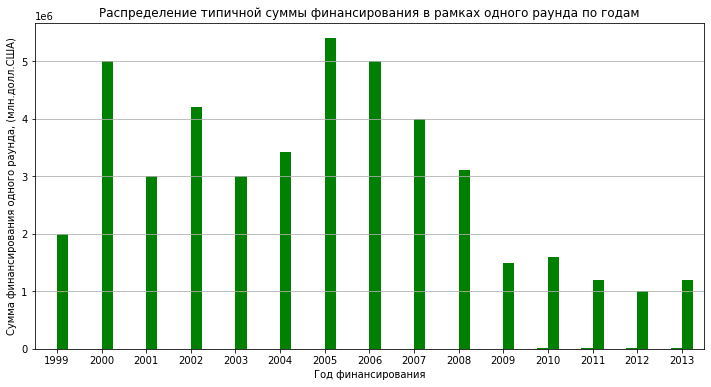

In [52]:
# Создадим столбчатую диаграмму на основе данных сводной таблицы:
table.plot(kind='bar', 
                title='Распределение типичной суммы финансирования в рамках одного раунда по годам', 
                ylabel='Сумма финансирования одного раунда, (млн.долл.США)', xlabel='Год финансирования',
                legend=False, rot=0, color='green', figsize=(12, 6))
plt.grid(axis='y')
plt.show()

Построим столбчатую диаграмму со скользящей средней относительно сумм финансирования одного раунда и линейным графиком с числом раундов.

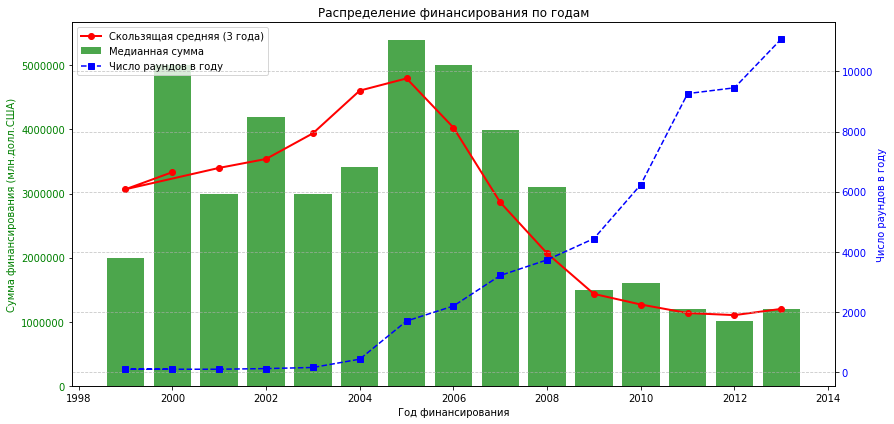

In [53]:
# Вычисляем скользящую среднюю для суммы финансирования с параметром window равным 3 года:
max_rounds['Скользящая средняя'] = max_rounds['raised_amount'].rolling(window=3, min_periods=1).mean()

# Задаем сетку и размер графика:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Строим диаграмму относительно суммы финансирования:
color = 'green'
ax1.set_xlabel('Год финансирования')
ax1.set_ylabel('Сумма финансирования (млн.долл.США)', color=color)
bars = ax1.bar(max_rounds['funded_at_year'], 
               max_rounds['raised_amount'], 
               color=color, alpha=0.7, label='Медианная сумма')
ax1.tick_params(axis='y', labelcolor=color)

# Создаем линию скользящей средней:
ax1.plot(max_rounds['funded_at_year'], 
         max_rounds['Скользящая средняя'], 
         color='red', marker='o', linewidth=2, 
         label='Скользящая средняя (3 года)')

# Строим линейный график по количеству раундов:
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Число раундов в году', color=color)
ax2.plot(max_rounds['funded_at_year'], 
         max_rounds['funding_rounds'], 
         color=color, marker='s', linestyle='--',
         label='Число раундов в году')
ax2.tick_params(axis='y', labelcolor=color)

# Настраиваем вид графика:
plt.title('Распределение финансирования по годам')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax1.ticklabel_format(axis='y', style='plain', useOffset=False)

# Объединяем легенды:
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

Text(0.5, 0, 'Год финансирования')

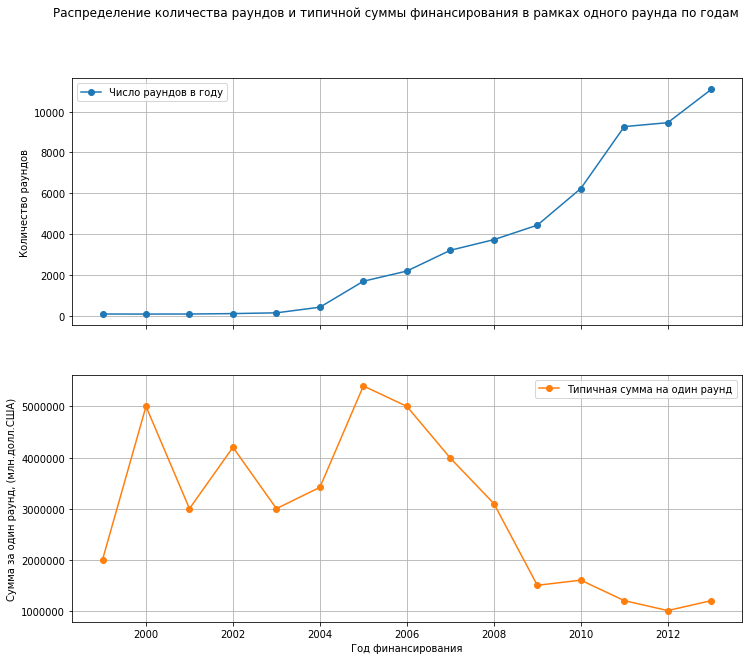

In [54]:
# Построим линейный график по годам, на котором отобразим и сумму финансирования одного раунда, и число раундов в году:
lp = table.plot(kind='line', 
                subplots=True, 
                sharex=True, sharey=False, 
                figsize=(12,10), marker='o', 
                title='Распределение количества раундов и типичной суммы финансирования в рамках одного раунда по годам')

lp[0].set_ylabel('Количество раундов')
lp[1].set_ylabel('Сумма за один раунд, (млн.долл.США)')
lp[0].grid(which='both')
lp[1].grid(which='both')
lp[1].ticklabel_format(axis='y', style='plain', useOffset=False)
plt.xlabel('Год финансирования')


***Исходя из полученных значений, выяснили, что:***

***1.*** *Типичный размер, собранных в рамках одного раунда, средств был максимален в 2005 году и составлял 5,4 млн.руб. Также стоит отметить, что начиная с этого года объем финансирования падает, а число раундов за год увеличивается. Это может свидетельствовать о том, что, начиная с 2005 года, активно инвестируются маленькие стартапы и их количество растёт, но на фоне этого средняя сумма  вложений в один стартап уменьшилась.;*


***2.*** *В 2013 относительно прошлых лет наблюдалось максимальное количество раундов - 11082, а стандартная сумма, выделенная в рамках одного раунда, была 1,2 млн.руб. Это меньше, чем во всех предыдущих годах, но незначительно больше, чем в 2012г. Заметим, что, начиная с 2005г. сумма финансирования стабильно начала снижаться, вплоть до 2009г. А количество раундов, наоборот, начиная с 2003 года стабильно идет вверх, достигая своего пика в 2013 году.*



###  Люди и их образование

Выясним, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний:
 
- оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуем выбранные границы групп.
- оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Для решения поставленных вопросов, объединим в единый датафрейм `df_peop_edu` датасеты `people.csv` и `education.csv`.

In [55]:
# Для объединения датафреймов воспользуемся методом merge(), 
# где объединение будет по столбцам 'id' для 'df_peop' (левый датафрейм) и 'person_id' для 'df_edu' (правый датафрейм), 
# а тип присоединения будет 'left', чтобы сохранить число всех сотрудников:
 
df_peop_edu = df_peop.merge(df_edu, left_on='id', right_on='person_id',how='left', suffixes = ('_people','_education'))
df_peop_edu = df_peop_edu.reset_index(drop=True)

# Выведем основную информацию о полученном датафрейме:
df_peop_edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int32         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   Int64         
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 17.6+ MB


In [56]:
df_peop_edu.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT


**Проанализируем полученный датафрейм df_peop_edu на дублирующиеся значения в связке столбцов  'company_id' и 'id_people'.**

In [57]:
# Посчитаем количество строк до удаления дубликатов с помощью метода shape[0] и результат сохраним 
# в переменную initial_row_count:
initial_row_count = df_peop_edu.shape[0]

# В переменной duplicat сохраняем найденное количество дубликатов по данному столбцу:
duplicat = df_peop_edu.loc[df_peop_edu.duplicated(subset=['company_id', 'id_people'], keep=False)].shape[0]

# Сортируем датафрейм по всем столбцам:
sorted_df = df_peop_edu.sort_values(by=list(df_peop_edu.columns))

# Удаляем дубликаты:
df_pe_total = sorted_df.drop_duplicates(subset=['company_id', 'id_people'])

# Выведем количество строк после удаления дубликатов:
row_not_dupl = df_pe_total.shape[0]

# Результат выведем на экран:

print(f'Исходное количество строк: {initial_row_count}')
print(f'Количество найденных дубликатов: {duplicat}')
print(f'Количесвто строк после удаления дубликатов: {row_not_dupl}')

Исходное количество строк: 267694
Количество найденных дубликатов: 73213
Количесвто строк после удаления дубликатов: 226709


* Получили преобразованный датафрейм `df_pe_total`, содержащий 226709 строк и 9 столбцов.

In [58]:
# Выведем разброс числа сотрудников в компаниях:
df_pe_total['company_id'].value_counts()

59        244
29        150
1242      138
231067     72
499        63
         ... 
24055       1
259359      1
23314       1
261468      1
78694       1
Name: company_id, Length: 22922, dtype: Int64

In [59]:
# Изучим статистические показатели столбца `company_id` в зависимости от количества сотрудников
# и сохраним их в переменной count_people:
print('Статистические показатели столбца company_id:')
df_pe_total['company_id'].value_counts().reset_index().describe()


Статистические показатели столбца company_id:


,index,company_id
count,22922.000000,22922.000000
mean,102688.472646,1.510121
std,84842.926930,2.764321
min,1.000000,1.000000
25%,28844.500000,1.000000
50%,70878.500000,1.000000
75%,174083.500000,1.000000
max,286091.000000,244.000000


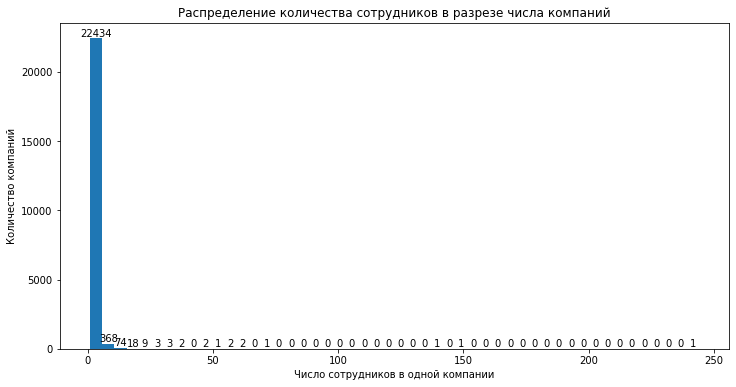

In [60]:
# Зададим визуально распределение количества сотрудников по компаниям:
ax=df_pe_total['company_id'].value_counts().plot(kind='hist', figsize=(12, 6), bins=50)
plt.title('Распределение количества сотрудников в разрезе числа компаний')
plt.xlabel('Число сотрудников в одной компании')
plt.ylabel('Количество компаний')
ax.bar_label(ax.containers[0])

plt.show()

***На графике видно, что основное число компаний содержат в штате не более 10-ти человек.***

Создадим более наглядную визуализацию распределения количества сотрудников по компаниям - столбчатую диаграмму подсчёта, используя sns.countplot(). Учитывая из предыдущего графика, что основное число сотрудников в компаниях находится в диапазоне от 1 до 10, предложим следующий вариант группировки: (0, 1, 2, 3, 5, 10, 25, float('inf')).

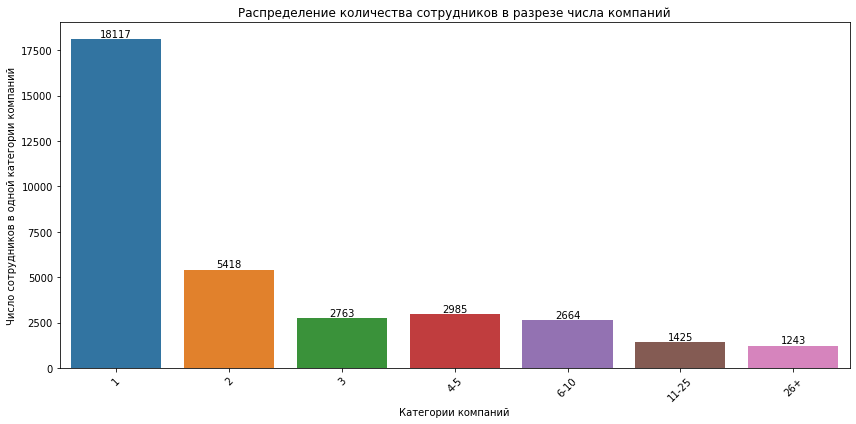

In [61]:
# Сгруппируем данные по предполагаемым диапазонам и зададим категории компаний:
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

# Создадим столбец 'employees_group', в который сохраним результат группировки числа сотрудников по столбцу 'company_id':
df_pe_total['employees_group'] = pd.cut(df_pe_total['company_id'].map(df_pe_total['company_id'].value_counts()),
                                      bins=bins, labels=labels)

# Построим диаграмму для сгруппированных данных:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='employees_group', data=df_pe_total)

# Настройки графика:
plt.title('Распределение количества сотрудников в разрезе числа компаний')
plt.xlabel('Категории компаний')
plt.ylabel('Число сотрудников в одной категории компаний')
plt.xticks(rotation=45) 

# Добавим подписи значений над столбцами:
ax.bar_label(ax.containers[0])

plt.tight_layout() 
plt.show()

*Данный график дает чёткое понимание отосительно распределения числа сотрудников в компаниях. Видно, что явно лидируют компании всего с одним сотрудником.*

***На основе полученной информации, подитожим:***

* *общее число сотрудников по всем компаням составляет 22922;*
* *основное количество сотрудников в одной компании находится в диапазоне от 1 до 2, но не более 10;*
* *всего 3 компании имеют штат сотрудников более 100 человек.*

***Сгруппируем компании в зависимости от числа сотрудников по следующим категориям:***

*'1',  '2',  '3',  '4-5',  '6-10',  '11-25',  '26+'*


*Проведём категоризацию.*

In [62]:
# Сохраним в переменную count_people результат группировки количества сотрудников по столбцу 'company_id':
count_people = df_pe_total.groupby('company_id')['id_people'].count()

# Создадим столбец 'employee_count', в котором для проверки отобразим число сотрудников в каждой компании:
df_pe_total['employee_count'] = df_pe_total['company_id'].map(count_people)

# Выделим категории по заданным параметрам с помощью метода cut() и сохраним изменения в новом столбце `сompany_category`:
df_pe_total['сompany_category'] = pd.cut(df_pe_total['employee_count'], 
                                         bins=[0, 1, 2, 3, 5, 10, 25, float('inf')], labels=['1', '2', '3', '4-5', '6-10', '11-25', '26+'], right=True)

# Выведем первые 10 строк датафрейма:
df_pe_total.head(10)

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,employees_group,employee_count,сompany_category
100011,2,Ben,Elowitz,4993,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01,1,1.0,1
191139,3,Kevin,Flaherty,1,NaN,706.0,3.0,Washington University in St Louis,NaT,2,2.0,2
202670,4,Raju,Vegesna,3,NaN,NaN,NaN,NaN,NaT,3,3.0,3
214176,5,Ian,Wenig,3,NaN,47870.0,5.0,The Aji Network,2005-01-01,3,3.0,3
225646,6,Kevin,Rose,16441,kevinrose,15624.0,6.0,"University of Nevada, Las Vegas",NaT,4-5,4.0,4-5
236914,7,Jay,Adelson,4,jayadelson,22649.0,7.0,Boston University,1992-01-01,11-25,13.0,11-25
248157,8,Owen,Byrne,4,owenbyrne,1027.0,8.0,Saint Mary's (Canada),1986-01-01,11-25,13.0,11-25
258507,9,Ron,Gorodetzky,4,NaN,8161.0,9.0,"University of California, San Diego (UCSD)",2003-01-01,11-25,13.0,11-25
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT,26+,61.0,26+
8886,11,Dustin,Moskovitz,5,NaN,13476.0,11.0,Harvard University,NaT,26+,61.0,26+


- После категоризации данных проверим результат: сгруппируем данные по выделенным категориям и посчитаем количество сотрудников в каждой категории.

In [63]:
# Сосчитаем количество сотрудников компаний по каждой категории: 
grouped_company = df_pe_total['сompany_category'].value_counts().sort_values(ascending=False)

print(grouped_company)

1        18117
2         5418
4-5       2985
3         2763
6-10      2664
11-25     1425
26+       1243
Name: сompany_category, dtype: int64


***Видно, что лидируют компании с количеством сотрудников всего один человек (в таких компаниях работают 18117 чел.), на втором месте компании с двумя сотрудниками - 5418 чел., затем - компании с 4-5 сотрудниками.***

In [64]:
# Заменим пропуски 'NaN' в стороком столбце 'instituition' на условное значение 'Нет данных' 
# для подсчета количества сотрудников без образования:
df_pe_total['instituition'] = df_pe_total['instituition'].fillna('Нет данных')
df_pe_total.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,employees_group,employee_count,сompany_category
100011,2,Ben,Elowitz,4993,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01,1,1.0,1
191139,3,Kevin,Flaherty,1,NaN,706.0,3.0,Washington University in St Louis,NaT,2,2.0,2
202670,4,Raju,Vegesna,3,NaN,NaN,NaN,Нет данных,NaT,3,3.0,3
214176,5,Ian,Wenig,3,NaN,47870.0,5.0,The Aji Network,2005-01-01,3,3.0,3
225646,6,Kevin,Rose,16441,kevinrose,15624.0,6.0,"University of Nevada, Las Vegas",NaT,4-5,4.0,4-5


In [65]:
# Сосчитаем по категориям компаний долю сотрудников, не имеющих образования:
round((df_pe_total[df_pe_total['instituition']=='Нет данных']['сompany_category'].value_counts() / df_pe_total['сompany_category'].value_counts())*100, 1).sort_values(ascending=False)

6-10     53.4
4-5      50.0
3        48.8
2        46.7
1        46.3
11-25    45.7
26+      27.3
Name: сompany_category, dtype: float64

***Судя по полученной информации, основное количество необразованных работников приходится на компании с числом сотрудников 6-10 чел. - 53%, далее, компании с 4-5 сотрудниками - доля без сведений об образовании составляет 50%. На третьем месте - компании с тремя сотрудниками - 49%. Таким образом, больше всего образованных работников в крупных компаниях, численностью более 26 человек - 27%.***

***Все необходимые условия задачи выполнены, поэтому нет необходимости в присоединении датасета `degrees.csv`.***

### Объединять или не объединять — вот в чём вопрос


- Выясним, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` находится в нескольких датасетах: `company_and_rounds.csv` (ник компании в сети), `people.csv` (ник сотрудника в соц.сетях) и `fund.csv` (ник фонда в сети). На первый взгляд, кажется, что информация в этих идентичных по названию столбцах должна быть уникальной. Проверим это с помощью диаграммы Венна и выясним степень пересечения между наборами данных в каждом из столбцов `network_username`. 

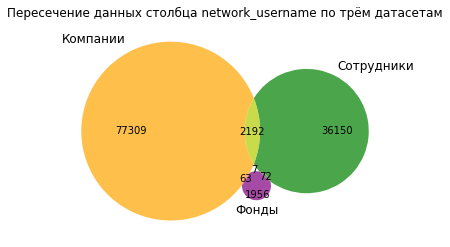

In [66]:
# Задаём параметры - множества и строим диаграмму Венна:
one_set = set(df_car['network_username'].dropna())
two_set = set(df_peop['network_username'].dropna())
three_set = set(df_fund['network_username'].dropna())

venn3([one_set, two_set, three_set], set_labels=('Компании', 'Сотрудники', 'Фонды'), set_colors=('orange', 'green', 'purple'), alpha=0.7)
plt.title('Пересечение данных столбца network_username по трём датасетам')
plt.show()


*Видно, что совпадение значений по столбцу `network_username` среди трёх датасетов незначительное, а именно:*
* *для датасета `company_and_rounds.csv` количество дублирующихся строк составляет всего 3% (при объединении с `people.csv`) и 0,08% (с `fund.csv`);*
* *для датасета `people.csv` - 6% (при объединении с `company_and_rounds.csv`) и 0,2% (с `fund.csv`);*
* *для датасета `fund.csv` - 3% (при объединении с `company_and_rounds.csv`) и 4% (с `people.csv`).*


*Столбцы `network_username` в данных датасетах, хоть и имеют одинаковое название, но содержат совершенно разную информацию: в датасете  `company_and_rounds.csv` - ники компаний в сетях, `people.csv` - ники сотрудников в соц.сетях, а `fund.csv` - ники фондов. И, судя по графику, число совпадений в названиях ников ничтожно.*

***Следовательно, объединение датафреймов по столбцу `network_username` нецелесообразно.***




### Проблемный датасет и причина возникновения пропусков


- Приведём данные датасета `company_and_rounds.csv` в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратим внимание на структуру датасета, порядок и названия столбцов, проанализируем значения.


- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Исходя из моих вышеизложенных предположенний о том, что:

* датасет `company_and_rounds.csv` состоит из нескольких таблиц, как минимум - из двух, это видно по количеству строк: одна часть датафрейма состоит, примерно,  из  217 тыс. строк, другая - из порядка 54 тыс.;
* датасет содержит два одинаковых столбца (по названию и содержанию): `company_ID` и `company_id`;
* судя, по информации, содержащейся в столбцах, часть из них относится к комапания, другая - к раундам финансирования;
* также, обратим внимание на порядок расположения столбцов в датафрейме. Первая половина столбцов с информацией о компаниях, вторая - о раундах. Как-будо таблицы соединили вертикально методом concat() (или UNION).


Поэтому, для удобства и корректности проведения дальнейшего исследования датасет `company_and_rounds.csv` разделим на два набора данных, один из которых будет содержать информацию о компаниях, участвующих в инвестициях, а другой - о раундах финансирования.

In [67]:
# Выгрузим информацию о датафрейме 'df-car':
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [68]:
# С помощью атрибута loc() выберем нужные столбцы и сохраним их в новый датафрейм 'df_company' с информацией о компании:
df_company = df_car.loc[:, ['company_ID', 'name', 'category_code', 'status', 'founded_at', 
                            'closed_at', 'domain', 'network_username', 'country_code', 
                            'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].reset_index(drop=True)
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  Int64         
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  Int64         
 10  funding_rounds     217472 non-null  Int64         
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float32(1), 

In [69]:
# Выведем первые строки датафрейма:
df_company.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4


***Датафрейм 'df_company'*** *содержит информацию о компаниях и их инвестициях. Занимает  21.6 МВ объема оперативной мапяти и включает 217774 строки и 13 столбцов.*

*Столбцы датафрейма `category_code`, `founded_at`, `closed_at`, `domain`, `network_username`, `country_code` содержат пропуски, которые пока оставим без изменений.* 

*Кроме того, видно, что в столбце `company_ID`, который содержит только уникальные значения, присутствуют дубликаты, которые необходимо удалить.*

In [70]:
# Аналогично создадим датафрейм 'df_round', содержащий информацию о раундах финансирования:
df_round = df_car.loc[:, ['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 
                          'participants', 'is_first_round', 'is_last_round', 'funded_at_year']].reset_index(drop=True)
df_round.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id           52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float32       
 5   pre_money_valuation  52928 non-null  float32       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
 9   funded_at_year       52680 non-null  UInt32        
dtypes: Int64(5), UInt32(1), datetime64[ns](1), float32(2), object(1)
memory usage: 15.4+ MB


In [71]:
# Выведем первые строки датафрейма:
df_round.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1,2005
1,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0,2007
2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0,2008
3,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


***Датафрейм 'df_round'*** *содержит информацию о раундах финансирования. Занимает  15.4 МВ объема оперативной мапяти и включает 217774 строки и 10 столбцов.*

*Исходя из количества строк в столбцах датафрейма, пропущенные значения отсутствуют, кроме столбцов `funded_at` и `funded_at_year`. Но общее число строк в данном датафрейме осталось такое же, как в предыдущем `df_car`. Оставим пропуски пока без изменений.* 

*Cтолбцы датафрейма df_round, которые содержат уникальные данные, также стоит проверить на наличие дубликатов.*

Проведём работу с дубликатами датафреймов.

**Обратимся к датафрейму df_company.**

In [72]:
# Посчитаем количество строк до удаления дубликатов с помощью метода shape[0] и результат сохраним 
# в переменную initial_row_count:
initial_row_count = df_company.shape[0]

# В переменной duplicat сохраняем найденное количество дубликатов по данному столбцу:
duplicat = df_company.loc[df_company.duplicated(subset='company_ID', keep=False)].shape[0]

# Сортируем датафрейм по всем столбцам:
sorted_df = df_company.sort_values(by=list(df_company.columns))

# Удаляем дубликаты:
df_company_fin = sorted_df.drop_duplicates(subset='company_ID')

# Выведем количество строк после удаления дубликатов:
row_not_dup = df_company_fin.shape[0]

# Результат выведем на экран:

print(f'Исходное количесвто строк: {initial_row_count}')
print(f'Количество найденных дубликатов: {duplicat}')
print(f'Количесвто строк после удаления дубликатов: {row_not_dup}')

Исходное количесвто строк: 217774
Количество найденных дубликатов: 32394
Количесвто строк после удаления дубликатов: 196554


**Перейдём к датафрейму df_round, в котором проверим столбец `funding_round_id`.**

In [73]:
# Посчитаем количество строк до удаления дубликатов с помощью метода shape[0] и результат сохраним 
# в переменную initial_row_count:
initial_row_count = df_round.shape[0]

# В переменной duplicat сохраняем найденное количество дубликатов по данному столбцу:
duplicat = df_round.loc[df_round.duplicated(subset='funding_round_id', keep=False)].shape[0]

# Сортируем датафрейм по всем столбцам:
sorted_df = df_round.sort_values(by=list(df_round.columns))

# Удаляем дубликаты:
df_round_fin = sorted_df.drop_duplicates(subset='funding_round_id')

# Выведем количество строк после удаления дубликатов:
row_not_dup = df_round_fin.shape[0]

# Результат выведем на экран:

print(f'Исходное количесвто строк: {initial_row_count}')
print(f'Количество найденных дубликатов: {duplicat}')
print(f'Количесвто строк после удаления дубликатов: {row_not_dup}')

Исходное количесвто строк: 217774
Количество найденных дубликатов: 164846
Количесвто строк после удаления дубликатов: 52929


***После проведенного преобразования получили два датафрейма 'df_company_fin' и 'df_round_fin', содержащих только уникальные значения по столбцам `company_ID` и `funding_round_id` соответственно. Теперь информация в двух датафреймах стала доступней и понятней. Можно удобно использовать её в дальнейшем анализе данных.***


## Шаг 3. Исследовательский анализ объединённых таблиц



###  Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмём данные из обработанного датасета `company_and_rounds.csv`, т.е. выделенный и преобразованный датафрейм `df_company_fin`, — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверим полноту и корректность получившейся таблицы. Далее будем работать только с этими данными.

In [74]:
# Выведем полную информацию о датафрейме 'df_company_fin':
df_company_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  float32       
 12  milestones         196553 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float32(1), 

Датафрейм содержит 196554 строки и 13 столбцов. Исходя из условий задачи, отфильтруем данный датафрейм по столбцам `status` cо значением  `acquired`, `funding_rounds` больше 0  или  `investment_rounds` больше 0, и выведем новый датафрейм 'df_status'.

In [75]:
# Отбираем строки датафрейма, которые соответствуют заданным условиям: 
df_status = df_company_fin[(df_company_fin['status']=='acquired') | (df_company_fin['funding_rounds'] > 0) | (df_company_fin['investment_rounds'] > 0)]
df_status = df_status.reset_index(drop=True)

# Выводим информацию о новом датасете и первые его строки:
df_status.info()
df_status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  float32       
 12  milestones         40747 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float32(1), object(6)
memory 

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,3.975000e+07,5
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,4.500000e+07,8
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2.425700e+09,5
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,8.000000e+05,4
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0.000000e+00,0


***Полученный датафрейм 'df_status' содержит 40747 строк и 13 столбцов, что соответствует требуемому согласно условий задачи числу компаний - порядка 40 тыс.. Данные этого датасета и будет использовать в дальнейшем анализе.*** 


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Выясним, применимы ли к таким данным обычные способы нахождения типичных значений?

**Рассмотрим датафрейм 'df_status'.**

In [76]:
# Выгрузим первые строки датафрейма:
df_status.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,3.975000e+07,5
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,4.500000e+07,8
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2.425700e+09,5
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,8.000000e+05,4
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0.000000e+00,0


Отметим, что столбец `funding_total` содержит записи чисел в экспоненциальном виде. Данные столбца необходимо привести к стандартному числовому  формату. 

In [77]:
# Отфарматируем значения столбцов датафрейма с типом данных float
# и выведем строки:
pd.set_option('display.float_format', '{:.2f}'.format)
display(df_status)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.00,5
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000.00,8
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700096.00,5
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000.00,4
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0,1,225000.00,0
40743,286184,Seldar Pharma,biotech,operating,NaT,NaT,NaN,NaN,USA,0,1,12999000.00,0
40744,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,NaN,USA,0,1,2156060.00,0
40745,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,NaN,USA,0,1,1588120.00,0


Избавимся от нулевых значений в столбце `funding_total` и проанализируем полученный датафрейм, который сохраним как df_status_1.

In [78]:
# Отберем строки датафрейма, которые соответствуют заданным условиям: 
df_status_1 = df_status[(df_status['funding_total'] > 0)]

# Выводим информацию о новом датасете и первые его строки:
df_status_1.info()
df_status_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27874 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         27874 non-null  Int64         
 1   name               27874 non-null  object        
 2   category_code      26857 non-null  object        
 3   status             27874 non-null  object        
 4   founded_at         21750 non-null  datetime64[ns]
 5   closed_at          1770 non-null   datetime64[ns]
 6   domain             26490 non-null  object        
 7   network_username   16633 non-null  object        
 8   country_code       26270 non-null  object        
 9   investment_rounds  27874 non-null  Int64         
 10  funding_rounds     27874 non-null  Int64         
 11  funding_total      27874 non-null  float32       
 12  milestones         27874 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float32(1), object(6)
memory 

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.00,5
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000.00,8
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700096.00,5
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000.00,4
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,3,16500000.00,4


In [79]:
# Изучим статистические показатели столбца `funding_total`:
print('Статистические показатели столбца funding_total:')
df_status_1['funding_total'].describe() 

Статистические показатели столбца funding_total:


count        27874.00
mean      14816520.00
std       67759360.00
min            291.00
25%         500000.00
50%        2564500.00
75%       11000000.00
max     5699999744.00
Name: funding_total, dtype: float64

In [80]:
# Дополнительно зададим сортировку значений столбца 'funding_total': 
df_status_1['funding_total'].sort_values()

10622          291.00
35698         1000.00
38499         1000.00
37243         1000.00
28800         1000.00
             ...     
19285   2400000000.00
2       2425700096.00
35718   2600000000.00
2102    3985050112.00
4132    5699999744.00
Name: funding_total, Length: 27874, dtype: float32

In [81]:
# Определим значение 95-го процентиля для понимания границы выбросов,
# который сохраним в переменной 'no_emissions', используя метод quantile():
no_emissions = round(df_status_1['funding_total'].quantile(0.95), 0)
print(no_emissions)

58454435.0


Значит, полученное значение 59 млн. долл. уже не является типичным для размера общего финансирования одной компании. Исходя из статистических показателей медианного и среднего значений суммы финансирования, можно предположить, что максимальное значение (5,7 млрд. долл.) является выбросом. Зададим дополнительные условия фильтрации и ограничим сумму финансирования диапазоном от 1000 долл.США до 15 млн. долл. Результат сохраним в новый датафрейм 'df_status_2'.

In [82]:
# Отбираем строки датафрейма, которые соответствуют заданным условиям: 
df_status_2 = df_status_1[(df_status['funding_total'] > 1000) & (df_status['funding_total'] < 15000000)]

# Выводим информацию о новом датасете и первые его строки:
df_status_2.info()
df_status_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22140 entries, 3 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         22140 non-null  Int64         
 1   name               22140 non-null  object        
 2   category_code      21253 non-null  object        
 3   status             22140 non-null  object        
 4   founded_at         17128 non-null  datetime64[ns]
 5   closed_at          1529 non-null   datetime64[ns]
 6   domain             20997 non-null  object        
 7   network_username   13383 non-null  object        
 8   country_code       20682 non-null  object        
 9   investment_rounds  22140 non-null  Int64         
 10  funding_rounds     22140 non-null  Int64         
 11  funding_total      22140 non-null  float32       
 12  milestones         22140 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float32(1), object(6)
memory 

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000.00,4
15,20,eBay,web,ipo,1995-09-01,NaT,ebay.com,eBay,USA,17,1,6700000.00,5
16,21,Wis.dm,network_hosting,closed,2006-06-01,2012-01-01,wis.dm,wis_dm,USA,0,1,5000000.00,0
17,22,MeetMoi,social,operating,2007-01-01,NaT,meetmoi.com,meetmoi,USA,0,3,5575000.00,0
21,26,Babelgum,games_video,closed,2007-03-01,2013-01-09,babelgum.com,Babelgum,GBR,0,1,13200000.00,0


Для анализа объема общего финансирования одной компании и определения типичного размера финансирования воспользуемся гистограммой и диаграммой распределения ("ящик с усами"), а также вычислим медианное значение общей суммы финансирования для одной компании, которое определит типичный размер финансирования. 

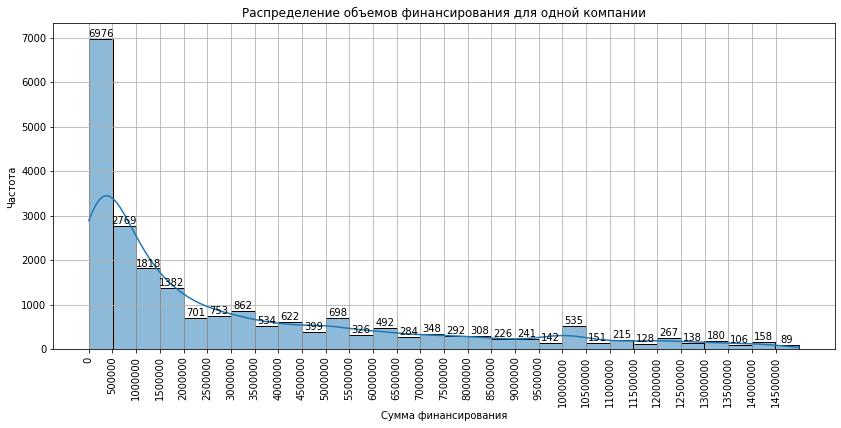

In [83]:
# Отобразим визуально распределение частоту размеров финансирования одной компании:
plt.figure(figsize=(14, 6))
ax=sns.histplot(data=df_status_2, x='funding_total', kde=True, bins=30)
plt.title('Распределение объемов финансирования для одной компании')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')

ax.ticklabel_format(axis='x', style='plain', useOffset=False)
ax.bar_label(ax.containers[0])

plt.xticks(range(0, 15000000, 500000))
plt.xticks(rotation=90)

plt.grid()
plt.show()

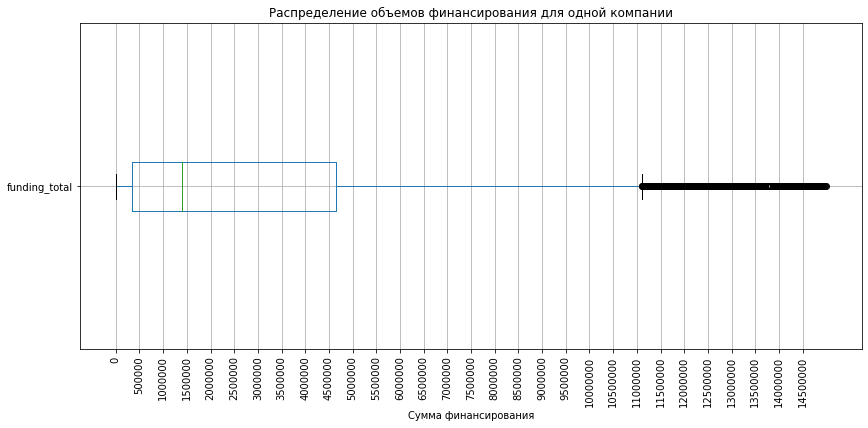

In [84]:
# Построим "ящик с усами":
boxplot=df_status_2.boxplot('funding_total', vert=False, figsize=(14,6))
boxplot.set_title('Распределение объемов финансирования для одной компании')
boxplot.set_xlabel('Сумма финансирования')

boxplot.ticklabel_format(axis='x', style='plain', useOffset=False)
plt.xticks(range(0, 15000000, 500000))
plt.xticks(rotation=90) 
plt.show()

In [85]:
# Вычислим типичный размер суммы финансирования одной компании с помощью медианы: 
df_status_2['funding_total'].median()

1400000.0

***По полученным результатам видно, что стандартные суммы финансирования для одной компании находятся в пределах 300 тыс.долл.США  -  5 млн.долл.США., а типичный размер финансирования составляет 1,4 млн. долл.США. Значения больше 11 млн. можно считать выбросами.***


### Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

Для данного исследования обратимся к датафреймам 'df_status' и 'df_acq' и объединим их. Используем диаграмму Венна для определения взаимосвязанных столбцов.

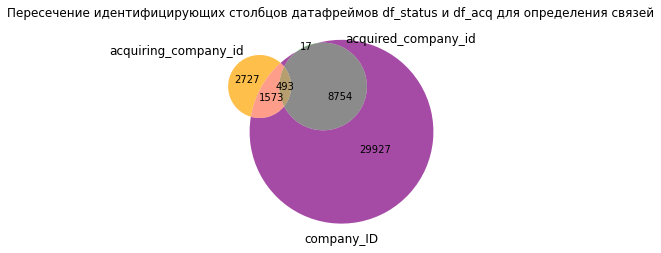

In [86]:
# Задаём параметры - множества и строим диаграмму Венна:
a_set = set(df_acq['acquiring_company_id'].dropna().unique())
b_set = set(df_acq['acquired_company_id'].dropna().unique())
c_set = set(df_status['company_ID'].dropna().unique())

venn3([a_set, b_set, c_set], set_labels=('acquiring_company_id', 'acquired_company_id', 'company_ID'), set_colors=('orange', 'green', 'purple'), alpha=0.7)
plt.title('Пересечение идентифицирующих столбцов датафреймов df_status и df_acq для определения связей')
plt.show()

*Исходя из полученной визуализации водно, что столбец `company_ID` полностью содержит в себе уникальные данные столбца `acquired_company_id`. Значит, соединение указанных датафреймов будем проводить по этим столбцам.*

In [87]:
# Для объединения датафреймов воспользуемся методом merge() c тип присоединения 'left': 
df_status_acq = df_status.merge(df_acq, left_on='company_ID', right_on='acquired_company_id',how='left')
df_status_acq = df_status_acq.reset_index(drop=True)

# Выведем основную информацию о полученном датафрейме:
df_status_acq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  Int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  Int64         
 10  funding_rounds        40890 non-null  Int64         
 11  funding_total         40890 non-null  float32       
 12  milestones            40890 non-null  Int64         
 13  id              

*Полученный датафрейм 'df_status_acq' содержит 40890 строк и 19 столбцов.*

In [88]:
# Зададим фильтр и выберем строки датафрейма, которые соответствуют условиям задачи:
df_sacq_1 = df_status_acq[((df_status_acq['price_amount'] == 0) | (df_status_acq['price_amount'] == 1)) & (df_status_acq['funding_total'] > 0)]

# Выводим информацию о новом датасете и первые его строки:
df_sacq_1.info()
df_sacq_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 5 to 38501
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            1618 non-null   Int64         
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   Int64         
 10  funding_rounds        1618 non-null   Int64         
 11  funding_total         1618 non-null   float32       
 12  milestones            1618 non-null   Int64         
 13  id               

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,3,16500000.00,4,7954.00,687.00,9.00,NaN,0.00,2012-11-28
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000.00,5,4283.00,20.00,13.00,NaN,0.00,2007-05-30
11,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0,3,18100000.00,4,2692.00,37730.00,14.00,NaN,0.00,2009-12-15
19,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0,1,45000000.00,5,2622.00,3396.00,23.00,NaN,0.00,2009-11-24
32,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0,4,23350000.00,2,5075.00,475.00,38.00,NaN,0.00,2011-01-31


***Получилось 1618 компании, в которых поэтапно вкладывались приличные суммы финансирования, но, в итоге, проданы за бесценок.***

Изучим детально столбец `funding_total` датафрейма 'df_sacq_1' и выведем его статистические показатели с помощью метода describe(), где к стандартному значению перцентиля в верхней границы (0.75) добавим значение 0.95 для большей уверенности в том, что данные, оставшиеся за пределами верхней границы, являются аномальными.  .

In [89]:
print('Статистические показатели столбца funding_total:')
df_sacq_1['funding_total'].describe(percentiles=[0.25, 0.50, 0.75, 0.95]) 

Статистические показатели столбца funding_total:


count         1618.00
mean      18152962.00
std      144503024.00
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
95%       51487500.00
max     5699999744.00
Name: funding_total, dtype: float64

*Видно, что основная часть значений расположена в границах 1-го и 3-го квартиля, т.е. от 2 млн. долл. до 15,5 млн.долл., а данные за пределами верхнего порога (перцентиль = 0.95, где сумма равна 51 млн.долл.) можно смело считать выбросами. Таким образом, определили диапазон объемов финансирования одной компании.* 

***Судя по анализу данных видно, что профинансированные компании стоимостью не больше доллара  переходят в собственность к другим компаниям за счёт их вложений в развитие этих стартапов. Это перспективное решение для них. То есть более крупные компании финансируют начинающие компании для последующего их приобретения или сотрудничества. Это позволяет крупным компаниям получить доступ к инновациям и идеям,что будет способствовать разработке новых продуктов (услуг), и благодаря чему эти компании могут быть первыми на рынке с новой разработкой.***


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.


**Обратимся к датафрейму 'df_status_acq'.**

In [123]:
# Выведем информацию о датафрейме:
df_status_acq.info()
df_status_acq.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  Int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  Int64         
 10  funding_rounds        40890 non-null  Int64         
 11  funding_total         40890 non-null  float32       
 12  milestones            40890 non-null  Int64         
 13  id              

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.00,5,NaN,NaN,NaN,NaN,NaN,NaT
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000.00,8,7386.00,20953.00,4.00,NaN,500000.00,2012-07-12
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700096.00,5,NaN,NaN,NaN,NaN,NaN,NaT
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000.00,4,NaN,NaN,NaN,NaN,NaN,NaT
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0.00,0,419.00,59.00,8.00,cash,625000000.00,2007-07-09
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,3,16500000.00,4,7954.00,687.00,9.00,NaN,0.00,2012-11-28
6,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.00,0,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
7,11,Fox Interactive Media,web,operating,1979-06-01,NaT,newscorp.com,networkapi,USA,2,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaT
8,12,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0,8,1160169984.00,6,NaN,NaN,NaN,NaN,NaN,NaT
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000.00,5,4283.00,20.00,13.00,NaN,0.00,2007-05-30


In [125]:
# Сгруппируем данные по столбцам 'category_code' и 'acquired_company_id' с агрегацией по столбцу 'price_amount' 
# (вычислим среднее и медианное значения, стандартное отклонение и количество сделок):
category_comp = df_status_acq.groupby(['category_code', 'acquired_company_id'])['price_amount'].agg(mean_price='mean',
                                                                                std_price='std', 
                                                                                median_price='median',                    
                                                                                count_price='count').reset_index()

# По полученным агригациям столбца 'price_amount' определим верхние пороговые значения, используя процентиль 0.75:
high_mean = category_comp['mean_price'].quantile(0.75)
high_std = category_comp['std_price'].quantile(0.75)
high_median = category_comp['median_price'].quantile(0.75)
high_count = category_comp['count_price'].quantile(0.75)

# Отфильтруем категории стартапов, где все показатели выше пороговых значений:
high_values = category_comp[(category_comp['mean_price'] >= high_mean) & 
                            (category_comp['std_price'] >= high_std) & 
                            (category_comp['median_price'] >= high_median) &
                            (category_comp['count_price'] >= high_count)].sort_values(by='mean_price', ascending=False)

# Проведём группировку по категориям стартапов, суммируя полученные показатели:
category_startup = high_values.groupby('category_code').agg({'mean_price': 'sum', 
                                                             'std_price': 'sum', 
                                                             'median_price': 'sum', 
                                                             'count_price': 'sum'}).sort_values(by='mean_price', ascending=False).reset_index()

# Выведем полученные данные с учетом числа сделок:
display('Категории стартапов с типично высокими ценами и значительным разбросом:')
display(category_startup[['category_code', 'mean_price', 'std_price', 'median_price', 'count_price']])

'Категории стартапов с типично высокими ценами и значительным разбросом:'

,category_code,mean_price,std_price,median_price,count_price
0,enterprise,1307125000000.00,1828896334199.95,1307125000000.00,4
1,software,8901350000.00,6555374836.35,8901350000.00,6
2,web,5417500000.00,2015146084.48,5717500000.00,11
3,games_video,5350000000.00,7566042558.70,5350000000.00,4
4,security,4163500000.00,5772112654.83,4163500000.00,4
5,advertising,2380400000.00,1810759045.26,2380400000.00,4
6,network_hosting,1362500000.00,1926865978.73,1362500000.00,4
7,mobile,1000000000.00,1414213562.37,1000000000.00,4
8,hardware,590000000.00,834386001.80,590000000.00,2
9,biotech,478780000.00,645192511.43,478780000.00,4


***Исходя из полученных данных, видно, что:***

* *по многим категориям среднее и медианное значения типично высоких цен за стартап совпадают. Это означает, что в данных практически отсутствуют выбросы;*
* *число сделок по стартапам с типично высокой ценой в одной категории колеблется от 2 до 11;*
* *всего по условиям задачи выделено 12 категорий, лидириующие позиции занимают "Предпринимательство" и "IT-технологии" (программное обеспечение и т.д.);*
* *максимальная типично высокая цена составляет 1307 млрд.долл, что, судя по статистическим показателям, вполне может быть реальным значением. А минимальная составляет 233 млн. (медианное значение - 160 млн., без учета выбросов) и соответствует категории "Консалтинг";*
* *все выведенные категории стартапов отличаются типично высокой стоимостью и значительным разбросом цен, что может заинтересовать крупных инвесторов.*


### Сколько раундов продержится стартап перед покупкой

- Проанализируем столбец `funding_rounds` и исследуем его значения. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [130]:
# Сгруппируем данные по столбцам 'status' и 'company_ID' и вычислим по столбцу 'funding_rounds' 
# среднее и медианное число раундов:
category_roun = df_status_acq.groupby(['status', 'company_ID'])['funding_rounds'].agg(mean_rounds='mean',
                                                                                median_rounds='median').reset_index()

# Проведём группировку по статусам стартапов, суммируя полученные показатели:
category_rounds = category_roun.groupby('status', as_index=False).agg({'mean_rounds': 'sum', 
                                                                     'median_rounds': 'sum'}).sort_values(by='median_rounds', ascending=False)

# Выведем полученные значения:
display('Статистика количества раундов финансирования по статусам компаний:')
display(category_rounds[['status', 'mean_rounds', 'median_rounds']])

'Статистика количества раундов финансирования по статусам компаний:'

,status,mean_rounds,median_rounds
3,operating,43580.00,43580.00
0,acquired,4918.00,4918.00
1,closed,2890.00,2890.00
2,ipo,1238.00,1238.00


*Стартапам свойственно всего четыре статуса: 'operating' - "в работе", 'acquired' - "приобретён", 'closed' - "закрыт" и 'ipo' - "IPO - первое публичное размещение акций". Отметим, что значения без выбросов (медиана и среднее совпадают), т.е. данные имеют нормальное распределение. Большинство раундов финансирования имеют стартапы, находящиеся в процессе разработки (статус "в работе"), меньше - приобретённые компании, затем - закрытые стартапы и меньше всего те, которые уже представили на рынке свою деятельность.*

Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов в зависимости от статуса.

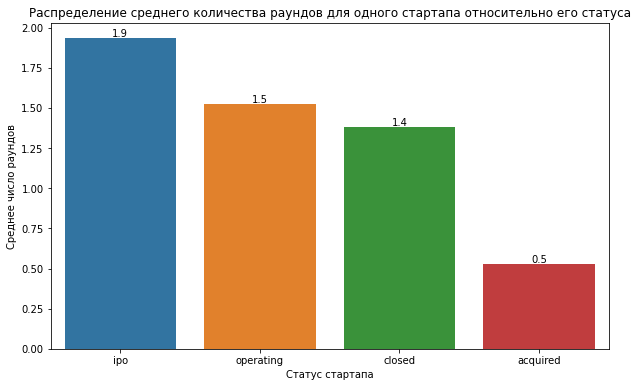

In [134]:
# Сгруппируем данные по статусам стартапов и выявим по каждому из них среднее число раундов:
round_agg = df_status_acq.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))

# Построим столбчатую диаграмму:
bx = sns.barplot(data=round_agg, x='status', y='funding_rounds')

plt.title('Распределение среднего количества раундов для одного стартапа относительно его статуса')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее число раундов')
bx.bar_label(bx.containers[0], fmt='%.1f')

plt.show()

*Видно, что максимальное среднее количество раундов принадлежит компаниям со статусом "IPO", затем стартапам, которые находятся в рабочем процессе, а меньше всего в среднем раундов у приобретенных стартапов.*


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Для проведения исследовательского анализа были предоставлены следующие файлы: `acquisition.csv`, `company_and_rounds.csv`, `people.csv`, `education.csv`, `degrees.csv`, `fund.csv` и `investment.csv`, но в работе задействовали только датасеты `acquisition.csv`, `company_and_rounds.csv`, `people.csv` и `education.csv` (остальные не пригодились). С данными этих датасетов был проведен большой объем работы относительно предварительной предобработки данных, а именно:


* процесс оптимизации размерности данных и их преобразование;
* выявление и дальнейшая работа с пропусками и дубликатами;
* объединение двух датасетов `people.csv` и `education.csv` в единный датафрейм `df_peop_edu`, который после выявления дубликатов был преобразован в  датафрейм `df_pe_total` с количеством 226709 строк и 9 столбцов;
* работа с данными столбца `network_username` для возможного использования его в объединении датафреймов;
* разделение датасета `company_and_rounds.csv` на два датафрейма `df_company` и `df_round`, которые после преобразования были сохранены в датафреймы `df_company_fin` (196554 строки и 13 столбцов) и `df_round_fin` (52929 строк и 10 столбцов);


и выборки столбцов, содержащих необходимую информацию для дальнейшего анализа данных.

По результатам проведённого исследовательского анализа данных сформулируем основной вывод и рекомендации для заказчика:


1. Основной объем финансирования стартапов с количеством раундов более 50 приходится на период 1999-2013гг. Отметим, что максимальный типичный размер средств, выделяемый в рамках одного раунда, зафиксирован в 2005г. и составляет 5,4 млн.долл.США. Но стоит обратить внимание, что начиная с этого года объем финансирования падает за счет увеличения числа раундов. Максимальное количество раундов наблюдалось в 2013 году. Это может свидетельствовать о том, что активно инвестируются маленькие стартапы и их количество растёт, а средняя сумма  вложений в один стартап на фоне этого уменьшается. 


2. Анализ сотрудников относительно образования и их количества в штате компании показывает, что  лидируют компании с количеством сотрудников всего один человек (в таких компаниях работают 18117 чел.), на втором месте компании с двумя сотрудниками - 5418 чел., меньше всего компаний с сотрудниками более 26 человек. Но в более крупных компаниях наиболее низкий процент (27%) работников без сведений об образовании. А больше всего необразованных работников приходится на компании с численностью 6-10 чел. (53%). 


3. Также, в ходе исследования было выявлено порядка 40 тыс. компаний, которые получали какое-либо финансирование (инвестирование). На их основе проводился анализ. 


4. Выяснили, что стандартные суммы финансирования одной компании находятся в диапазоне 300 тыс.долл.США - 5 млн.долл.США., а типичный размер финансирования составляет 1,4 млн.долл.США.


5. Диапазон объемов финансирования одной компании находится в пределах от 2 млн. долл. до 15,5 млн.долл.США. Так же, провели расследование относительно профинансированных компаний стоимостью не больше доллара. Количество таких компаний составляет 1618. Выяснили, что данные компании переходят в собственность к другим, более крупным, компаниям за счёт их вложений в развитие этих стартапов. То есть более крупные компании финансируют начинающие компании для последующего их приобретения или сотрудничества. Это позволяет крупным компаниям получить доступ к инновациям и идеям,что будет способствовать разработке новых продуктов (услуг), и благодаря чему эти компании могут быть первыми на перспективном рынке с новой разработкой.


6. Выделили 12 категорий стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен, где лидириующие позиции занимают "Предпринимательство" и "IT-технологии" (программное обеспечение, сеть, разработка компьютерных игр, безопасность). Отметим, что максимальная типично высокая цена составляет 1307 млрд.долл.США, а минимальная - 233 млн.долл.США (медианное значение - 160 млн., без учета выбросов) и соответствует категории "Консалтинг". Все выведенные категории стартапов отличаются типично высокой стоимостью и значительным разбросом цен, что может заинтересовать крупных инвесторов.


7. Отметим, что стартапам присвоены всего четыре статуса: 'operating' - "в работе", 'acquired' - "приобретён", 'closed' - "закрыт" и 'ipo' - "IPO - первое публичное размещение акций". Большинство раундов финансирования имеют стартапы, находящиеся в процессе разработки (статус "в работе") - 43580 раундов, меньше - приобретённые компании (4918), затем - закрытые стартапы (2890) и меньше всего те, которые уже представили на рынке свою деятельность ("IPO") - 1238. 


8. Исследуя распределение среднего количества раундов финансирования одного стартапа в зависимости от его статуса, определим, что максимальное среднее количество раундов принадлежит компаниям со статусом "IPO"- 2 раунда, затем стартапам, которые находятся в рабочем процессе, а меньше всего в среднем раундов у приобретенных стартапов - 0.5 раунда.



**В качестве рекомендаций** на основании вышеизложенного можно предположить, что основное внимание можно обратить на категории "Предпренимательство" и "IT-технологии". К финансированию стоит рассматривать компании со статусом "в работе" или "приобретённые" и со средней численностью сотрудников более 26 человек, в них больше образованных работников. А типичная сумма инвестирования стартапов  будет зависить от объема вложений, к которым готова финансовая компания.   
